In [4]:

!pip install pmdarima
!pip install pmdarima==2.0.3

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached pmdarima-2.0.3.tar.gz (630 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pmdarima


  error: subprocess-exited-with-error
  
  × Building wheel for pmdarima (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [41 lines of output]
      <string>:15: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
      Partial import of pmdarima during the build process.
      
      Requirements: ['joblib>=0.11\nCython>=0.29,!=0.29.18,!=0.29.31\nnumpy>=1.21.2\npandas>=0.19\nscikit-learn>=0.22\nscipy>=1.3.2\nstatsmodels>=0.13.2\nurllib3\nsetuptools>=38.6.0,!=50.0.0\n']
      Adding extra setuptools args
      Traceback (most recent call last):
        File "<string>", line 190, in check_package_status
        File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\importlib\__init__.py", line 90, in import_module
          return _

🚀 ============================================================
   ANÁLISIS DE DEMANDA ERRÁTICA CON TRATAMIENTO DE OUTLIERS
🚀 ============================================================
🔍 Verificando pmdarima...
❌ pmdarima - No disponible: cannot import name '_lazywhere' from 'scipy._lib._util' (C:\Users\ASUS\AppData\Local\Packages\Python...
💡 Solución: pip uninstall pmdarima && pip install scipy==1.10.1 && pip install pmdarima

⚠️  pmdarima no disponible, usando implementación simple.
🔧 Para mejor rendimiento, instala pmdarima correctamente.

1️⃣ Generando datos de demanda errática...
🔄 Intento 1: ADI=1.515, CV²=0.314 → Intermittent
🔄 Intento 2: ADI=1.456, CV²=0.462 → Intermittent
🔄 Intento 3: ADI=1.376, CV²=0.270 → Intermittent
🔄 Intento 4: ADI=1.515, CV²=0.403 → Intermittent
🔄 Intento 5: ADI=1.667, CV²=0.280 → Intermittent
🔄 Intento 6: ADI=1.389, CV²=0.329 → Intermittent
🔄 Intento 7: ADI=1.456, CV²=0.302 → Intermittent
🔄 Intento 8: ADI=1.293, CV²=0.273 → Smooth
🔄 Intento 9: ADI=1.36

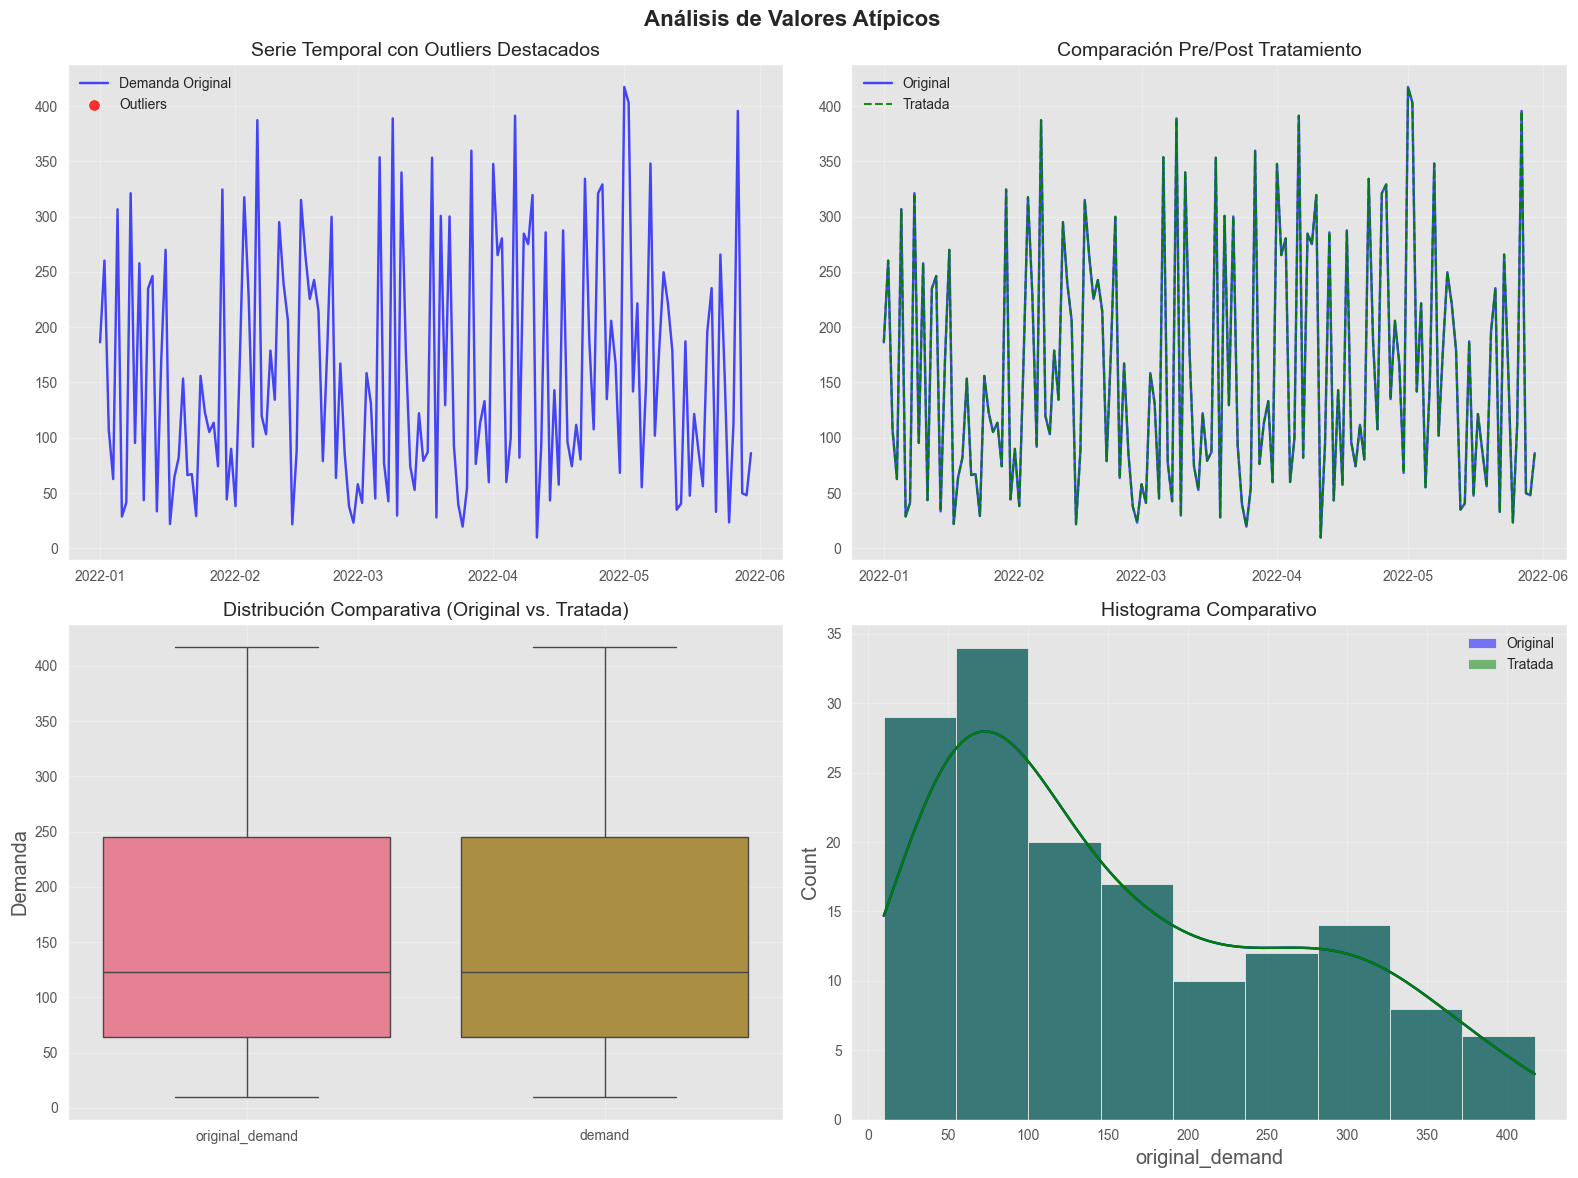


📊 ANÁLISIS DE CARACTERÍSTICAS DE LA DEMANDA
📈 Estadísticas Básicas (Original vs. Tratada):
   • Media: 158.05 → 158.05
   • Mediana: 122.56 → 122.56
   • Desviación estándar: 109.94 → 109.94
   • Coeficiente de variación: 0.696 → 0.696
   • Rango: [9.72, 417.26] → [9.72, 417.26]

📊 Distribución (Percentiles - Original vs. Tratada):
   • P10: 39.53 → 39.53
   • P25: 64.62 → 64.62
   • P50: 122.56 → 122.56
   • P75: 245.39 → 245.39
   • P90: 321.51 → 321.51
   • P95: 353.54 → 353.54

🎯 División de datos: 112 entrenamiento, 38 prueba

3️⃣ Aplicando Auto ARIMA...
🔄 Aplicando ARIMA simple (implementación básica)...

4️⃣ Evaluando pronósticos...

📈 Métricas de Error ARIMA:
   • MAE: 96.89
   • RMSE: 116.33
   • MAPE: 105.94%

5️⃣ Generando visualizaciones...


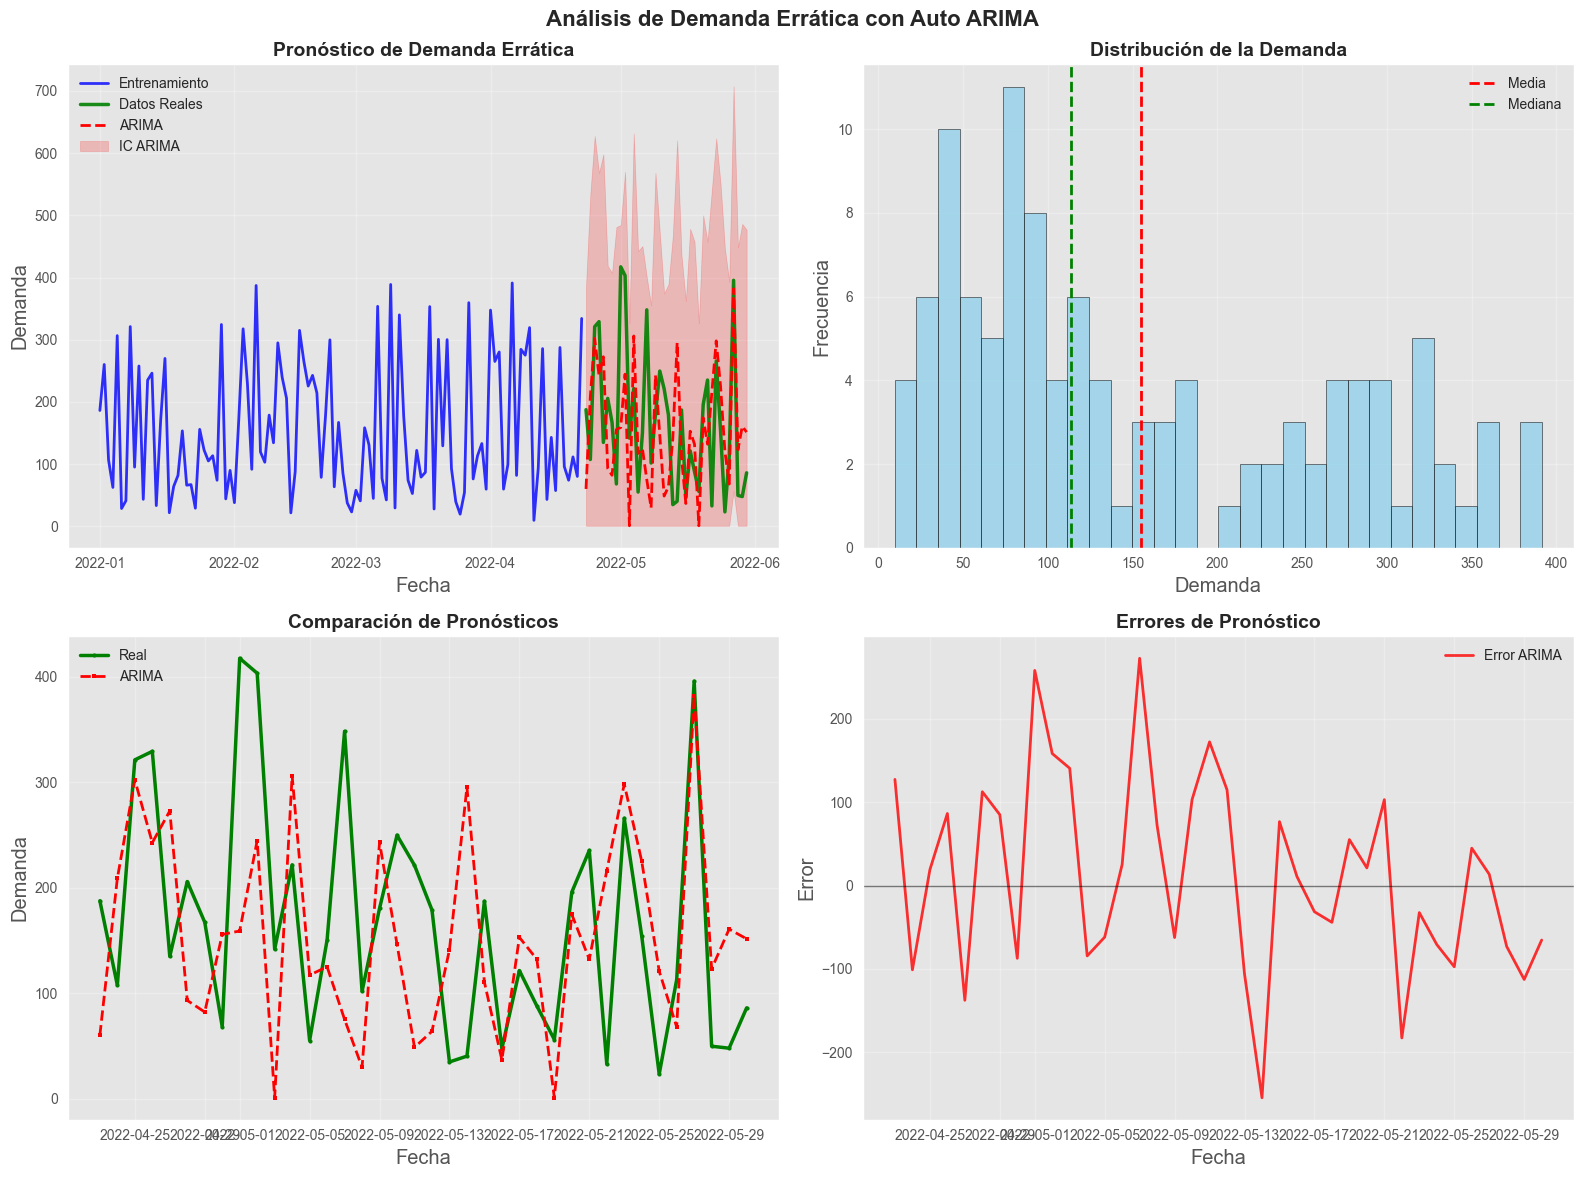


🎯 CONCLUSIONES
✅ Análisis completado exitosamente
📌 Se detectaron y trataron 0 valores atípicos
📌 La demanda errática presenta alta variabilidad
📌 Auto ARIMA maneja mejor la complejidad después del tratamiento
📌 Se recomienda:
   - Usar stocks de seguridad altos
   - Monitorear patrones frecuentemente
   - Revisar periódicamente el tratamiento de outliers


In [41]:
"""
ANÁLISIS DE DEMANDA ERRÁTICA CON AUTO ARIMA - VERSIÓN COMPLETA CON TRATAMIENTO DE OUTLIERS
=========================================================================================

MEJORAS PRINCIPALES:
-------------------
1. Detección y tratamiento de valores atípicos
2. Métodos alternativos para manejo de outliers
3. Visualización mejorada de valores extremos
4. Análisis comparativo pre/post tratamiento
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('ggplot')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Variable global para controlar si pmdarima está disponible
PMDARIMA_AVAILABLE = False

def check_pmdarima():
    """Verifica si pmdarima está disponible"""
    global PMDARIMA_AVAILABLE
    
    print("🔍 Verificando pmdarima...")
    
    try:
        from pmdarima import auto_arima
        PMDARIMA_AVAILABLE = True
        print("✅ pmdarima - Disponible")
        return True
    except ImportError as e:
        print(f"❌ pmdarima - No disponible: {str(e)[:100]}...")
        print("💡 Solución: pip uninstall pmdarima && pip install scipy==1.10.1 && pip install pmdarima")
        return False

def generate_erratic_demand(n_periods=120, base_demand=50, seed=42, zero_prob=0.3):
    """Genera datos de demanda errática con más períodos en cero"""
    np.random.seed(seed)
    
    # Crear fechas
    dates = pd.date_range(start='2022-01-01', periods=n_periods, freq='D')
    
    # Inicializar demanda base con ceros según la probabilidad
    demand = np.where(np.random.random(n_periods) < zero_prob, 0, base_demand)
    
    # Componente de tendencia ligera (solo para períodos no cero)
    trend = np.linspace(0, 8, n_periods)
    demand = np.where(demand > 0, demand + trend, 0)
    
    # Componente estacional semanal (solo para períodos no cero)
    days = np.arange(n_periods)
    seasonal = 5 * np.sin(2 * np.pi * days / 7) + 3 * np.cos(2 * np.pi * days / 14)
    demand = np.where(demand > 0, demand + seasonal, 0)
    
    # COMPONENTE ERRÁTICO FUERTE (solo para períodos no cero)
    # Ruido exponencial para alta variabilidad
    exponential_noise = np.random.exponential(scale=30, size=n_periods)
    demand = np.where(demand > 0, demand + exponential_noise, 0)
    
    # Spikes aleatorios grandes (solo para períodos no cero)
    spike_prob = 0.20
    spike_indices = np.random.choice(n_periods, size=int(n_periods * spike_prob), replace=False)
    spike_values = np.random.uniform(40, 120, size=len(spike_indices))
    for i, idx in enumerate(spike_indices):
        if demand[idx] > 0:  # Solo aplicar spikes a períodos no cero
            demand[idx] += spike_values[i]
    
    # Variabilidad multiplicativa (solo para períodos no cero)
    multiplier = np.random.lognormal(mean=0, sigma=0.4, size=n_periods)
    demand = np.where(demand > 0, demand * multiplier, 0)
    
    # Ruido gamma adicional (solo para períodos no cero)
    gamma_noise = np.random.gamma(shape=1.2, scale=20, size=n_periods)
    demand = np.where(demand > 0, demand + gamma_noise, 0)
    
    # Valores extremos (solo para períodos no cero)
    extreme_indices = np.random.choice(n_periods, size=int(n_periods * 0.1), replace=False)
    extreme_values = np.random.uniform(80, 200, size=len(extreme_indices))
    for i, idx in enumerate(extreme_indices):
        if demand[idx] > 0:  # Solo aplicar valores extremos a períodos no cero
            demand[idx] += extreme_values[i]
    
    # Asegurar valores no negativos
    demand = np.maximum(demand, 0)
    
    return pd.DataFrame({
        'date': dates,
        'demand': demand,
        'original_demand': demand.copy()  # Guardamos una copia sin tratar
    })

def detect_outliers_iqr(data, column='demand', threshold=1.5):
    """Detección de outliers usando el método IQR"""
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    return outliers

def treat_outliers(data, method='median', window=7, threshold=3.0):
    """
    Tratamiento de valores atípicos con múltiples métodos
    Opciones: 'median', 'mean', 'rolling', 'clip', 'remove'
    """
    data = data.copy()
    outliers = detect_outliers_iqr(data, threshold=threshold)
    
    print(f"🔧 Detectados {outliers.sum()} valores atípicos ({outliers.mean()*100:.1f}% del total)")
    
    if method == 'median':
        median = data['demand'].median()
        data.loc[outliers, 'demand'] = median
        
    elif method == 'mean':
        mean = data['demand'].mean()
        data.loc[outliers, 'demand'] = mean
        
    elif method == 'rolling':
        data['demand'] = data['demand'].rolling(window=window, center=True, min_periods=1).median()
        
    elif method == 'clip':
        q1 = data['demand'].quantile(0.05)
        q3 = data['demand'].quantile(0.95)
        data['demand'] = data['demand'].clip(lower=q1, upper=q3)
        
    elif method == 'remove':
        data = data[~outliers].reset_index(drop=True)
    
    return data

def calculate_demand_metrics(demand_series):
    """Calcula ADI y CV² para clasificar el tipo de demanda"""
    demand_clean = demand_series.dropna()
    non_zero_demand = demand_clean[demand_clean > 0]
    
    if len(non_zero_demand) == 0:
        return np.inf, np.inf
    
    # Average Demand Interval (ADI)
    zero_periods = len(demand_clean) - len(non_zero_demand)
    if zero_periods == 0:
        adi = 1.0
    else:
        adi = len(demand_clean) / len(non_zero_demand)
    
    # Coeficiente de Variación al cuadrado (CV²)
    mean_demand = non_zero_demand.mean()
    std_demand = non_zero_demand.std()
    
    if mean_demand == 0:
        cv_squared = np.inf
    else:
        cv_squared = (std_demand / mean_demand) ** 2
    
    return adi, cv_squared

def classify_demand_pattern(adi, cv_squared):
    """Clasifica el patrón de demanda según ADI y CV²"""
    if adi < 1.32 and cv_squared < 0.49:
        return "Smooth"
    elif adi >= 1.32 and cv_squared < 0.49:
        return "Intermittent"
    elif adi < 1.32 and cv_squared >= 0.49:
        return "Erratic"
    else:
        return "Lumpy"

def simple_arima_forecast(train_data, forecast_periods=30):
    """Implementación simple de ARIMA cuando pmdarima no está disponible"""
    print("🔄 Aplicando ARIMA simple (implementación básica)...")
    
    demand = train_data['demand'].values
    diff_demand = np.diff(demand)
    
    # Modelo AR(1) simple
    mean_demand = np.mean(demand[1:])
    lag1_corr = np.corrcoef(demand[:-1], demand[1:])[0, 1]
    
    # Pronóstico usando AR(1)
    forecast = []
    last_value = demand[-1]
    
    for i in range(forecast_periods):
        if i == 0:
            next_value = mean_demand + lag1_corr * (last_value - mean_demand)
        else:
            next_value = mean_demand + lag1_corr * (forecast[-1] - mean_demand)
        
        # Añadir ruido para simular incertidumbre
        noise = np.random.normal(0, np.std(diff_demand) * 0.5)
        next_value += noise
        
        forecast.append(max(next_value, 1))
    
    # Intervalos de confianza simples
    std_error = np.std(diff_demand)
    lower_bound = [max(f - 1.96 * std_error, 1) for f in forecast]
    upper_bound = [f + 1.96 * std_error for f in forecast]
    
    # Crear fechas para el pronóstico
    forecast_dates = pd.date_range(
        start=train_data['date'].iloc[-1] + timedelta(days=1),
        periods=forecast_periods,
        freq='D'
    )
    
    return pd.DataFrame({
        'date': forecast_dates,
        'forecast': forecast,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    })

def apply_auto_arima(train_data, forecast_periods=30):
    """Aplica Auto ARIMA si está disponible"""
    if not PMDARIMA_AVAILABLE:
        return simple_arima_forecast(train_data, forecast_periods)
    
    from pmdarima import auto_arima
    
    print("🔄 Aplicando Auto ARIMA...")
    
    try:
        # Ajustar modelo con parámetros optimizados
        model = auto_arima(
            train_data['demand'],
            start_p=0, start_q=0,
            max_p=3, max_q=3,
            max_P=2, max_Q=2,
            seasonal=True,
            stepwise=True,
            suppress_warnings=True,
            error_action='ignore',
            m=7,
            random_state=42,
            n_fits=30
        )
        
        print(f"📊 Modelo seleccionado: {model.order}")
        if hasattr(model, 'seasonal_order'):
            print(f"📊 Orden estacional: {model.seasonal_order}")
        
        # Realizar pronóstico
        forecast, conf_int = model.predict(n_periods=forecast_periods, return_conf_int=True)
        
        # Crear fechas
        forecast_dates = pd.date_range(
            start=train_data['date'].iloc[-1] + timedelta(days=1),
            periods=forecast_periods,
            freq='D'
        )
        
        return pd.DataFrame({
            'date': forecast_dates,
            'forecast': forecast,
            'lower_bound': conf_int[:, 0],
            'upper_bound': conf_int[:, 1]
        })
        
    except Exception as e:
        print(f"⚠️ Error en Auto ARIMA: {e}")
        print("🔄 Usando implementación ARIMA simple...")
        return simple_arima_forecast(train_data, forecast_periods)

def evaluate_forecast(actual, forecast):
    """Evalúa precisión del pronóstico"""
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    
    min_length = min(len(actual), len(forecast))
    actual_values = actual[:min_length]
    forecast_values = forecast[:min_length]
    
    mae = mean_absolute_error(actual_values, forecast_values)
    rmse = np.sqrt(mean_squared_error(actual_values, forecast_values))
    mape = np.mean(np.abs((actual_values - forecast_values) / actual_values)) * 100
    
    return {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape
    }

def plot_outliers_analysis(data):
    """Visualización especializada para análisis de outliers"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Análisis de Valores Atípicos', fontsize=16, fontweight='bold')
    
    # Gráfico de serie temporal con outliers destacados
    ax1 = axes[0, 0]
    outliers = detect_outliers_iqr(data)
    ax1.plot(data['date'], data['original_demand'], 'b-', label='Demanda Original', alpha=0.7)
    ax1.scatter(data[outliers]['date'], data[outliers]['original_demand'], 
                color='red', label='Outliers', alpha=0.8, s=50)
    ax1.set_title('Serie Temporal con Outliers Destacados', fontsize=14)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Comparación pre/post tratamiento
    ax2 = axes[0, 1]
    ax2.plot(data['date'], data['original_demand'], 'b-', label='Original', alpha=0.7)
    ax2.plot(data['date'], data['demand'], 'g--', label='Tratada', alpha=0.9, linewidth=1.5)
    ax2.set_title('Comparación Pre/Post Tratamiento', fontsize=14)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Boxplot comparativo
    ax3 = axes[1, 0]
    sns.boxplot(data=data[['original_demand', 'demand']], ax=ax3)
    ax3.set_title('Distribución Comparativa (Original vs. Tratada)', fontsize=14)
    ax3.set_ylabel('Demanda')
    ax3.grid(True, alpha=0.3)
    
    # Histograma comparativo
    ax4 = axes[1, 1]
    sns.histplot(data['original_demand'], color='blue', label='Original', kde=True, ax=ax4, alpha=0.5)
    sns.histplot(data['demand'], color='green', label='Tratada', kde=True, ax=ax4, alpha=0.5)
    ax4.set_title('Histograma Comparativo', fontsize=14)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_results(train_data, test_data, arima_results):
    """Visualiza resultados del análisis"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Análisis de Demanda Errática con Auto ARIMA', fontsize=16, fontweight='bold')
    
    # Gráfico principal
    ax1 = axes[0, 0]
    ax1.plot(train_data['date'], train_data['demand'], 'b-', label='Entrenamiento', linewidth=2, alpha=0.8)
    ax1.plot(test_data['date'], test_data['demand'], 'g-', label='Datos Reales', linewidth=2.5, alpha=0.9)
    ax1.plot(arima_results['date'], arima_results['forecast'], 'r--', label='ARIMA', linewidth=2)
    
    ax1.fill_between(arima_results['date'], 
                     arima_results['lower_bound'], 
                     arima_results['upper_bound'], 
                     alpha=0.2, color='red', label='IC ARIMA')
    
    ax1.set_title('Pronóstico de Demanda Errática', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Demanda')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Histograma de demanda
    ax2 = axes[0, 1]
    ax2.hist(train_data['demand'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    ax2.axvline(train_data['demand'].mean(), color='red', linestyle='--', linewidth=2, label='Media')
    ax2.axvline(train_data['demand'].median(), color='green', linestyle='--', linewidth=2, label='Mediana')
    ax2.set_title('Distribución de la Demanda', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Demanda')
    ax2.set_ylabel('Frecuencia')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Comparación de pronósticos
    ax3 = axes[1, 0]
    comparison_length = min(len(test_data), len(arima_results))
    dates_comp = test_data['date'][:comparison_length].reset_index(drop=True)
    real_values = test_data['demand'][:comparison_length].reset_index(drop=True)
    forecast_values = arima_results['forecast'][:comparison_length].reset_index(drop=True)
    
    ax3.plot(dates_comp, real_values, 'g-', 
             label='Real', linewidth=2.5, marker='o', markersize=3)
    ax3.plot(dates_comp, forecast_values, 'r--', 
             label='ARIMA', linewidth=2, marker='s', markersize=3)
    
    ax3.set_title('Comparación de Pronósticos', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Fecha')
    ax3.set_ylabel('Demanda')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Análisis de errores
    ax4 = axes[1, 1]
    arima_errors = real_values - forecast_values
    ax4.plot(dates_comp, arima_errors, 'r-', label='Error ARIMA', alpha=0.8, linewidth=2)
    ax4.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
    ax4.set_title('Errores de Pronóstico', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Fecha')
    ax4.set_ylabel('Error')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def analyze_demand_characteristics(data):
    """Análisis detallado de características de demanda"""
    print("\n📊 ANÁLISIS DE CARACTERÍSTICAS DE LA DEMANDA")
    print("=" * 50)
    
    demand = data['demand']
    original_demand = data['original_demand']
    
    # Estadísticas básicas (comparativas)
    print(f"📈 Estadísticas Básicas (Original vs. Tratada):")
    print(f"   • Media: {original_demand.mean():.2f} → {demand.mean():.2f}")
    print(f"   • Mediana: {original_demand.median():.2f} → {demand.median():.2f}")
    print(f"   • Desviación estándar: {original_demand.std():.2f} → {demand.std():.2f}")
    print(f"   • Coeficiente de variación: {(original_demand.std()/original_demand.mean()):.3f} → {(demand.std()/demand.mean()):.3f}")
    print(f"   • Rango: [{original_demand.min():.2f}, {original_demand.max():.2f}] → [{demand.min():.2f}, {demand.max():.2f}]")
    
    # Percentiles comparativos
    print(f"\n📊 Distribución (Percentiles - Original vs. Tratada):")
    for p in [10, 25, 50, 75, 90, 95]:
        orig_p = original_demand.quantile(p/100)
        treated_p = demand.quantile(p/100)
        print(f"   • P{p}: {orig_p:.2f} → {treated_p:.2f}")

def main():
    """Función principal del análisis"""
    print("🚀 " + "=" * 60)
    print("   ANÁLISIS DE DEMANDA ERRÁTICA CON TRATAMIENTO DE OUTLIERS")
    print("🚀 " + "=" * 60)
    
    # Verificar pmdarima
    if not check_pmdarima():
        print("\n⚠️  pmdarima no disponible, usando implementación simple.")
        print("🔧 Para mejor rendimiento, instala pmdarima correctamente.")
    
    # Generar datos erráticos
    print("\n1️⃣ Generando datos de demanda errática...")
    
    # Intentar múltiples veces hasta obtener demanda errática
    max_attempts = 10
    data = None
    
    for attempt in range(max_attempts):
        temp_data = generate_erratic_demand(n_periods=150, seed=42 + attempt)
        adi, cv_squared = calculate_demand_metrics(temp_data['demand'])
        pattern = classify_demand_pattern(adi, cv_squared)
        
        print(f"🔄 Intento {attempt + 1}: ADI={adi:.3f}, CV²={cv_squared:.3f} → {pattern}")
        
        if pattern == "Erratic":
            data = temp_data
            break
    
    if data is None:
        print("❌ Generando datos con alta variabilidad forzada...")
        np.random.seed(42)
        dates = pd.date_range(start='2022-01-01', periods=150, freq='D')
        base_demand = np.random.exponential(scale=50, size=150)
        spikes = np.random.choice([0, 1], size=150, p=[0.7, 0.3])
        spike_values = np.random.uniform(100, 300, size=150) * spikes
        demand = base_demand + spike_values + np.random.gamma(2, 25, size=150)
        
        data = pd.DataFrame({
            'date': dates,
            'demand': demand,
            'original_demand': demand.copy()
        })
        adi, cv_squared = calculate_demand_metrics(data['demand'])
        pattern = classify_demand_pattern(adi, cv_squared)
    
    # Mostrar métricas finales
    print(f"\n📊 Métricas Finales (Pre-tratamiento):")
    print(f"   • ADI: {adi:.3f}")
    print(f"   • CV²: {cv_squared:.3f}")
    print(f"   • Patrón: {pattern}")
    
    # Tratamiento de outliers
    print("\n2️⃣ Aplicando tratamiento de valores atípicos...")
    print("💡 Métodos disponibles: 'median', 'mean', 'rolling', 'clip', 'remove'")
    data = treat_outliers(data, method='median', threshold=2.5)
    
    # Recalcular métricas post-tratamiento
    adi_treated, cv_squared_treated = calculate_demand_metrics(data['demand'])
    pattern_treated = classify_demand_pattern(adi_treated, cv_squared_treated)
    
    print(f"\n📊 Métricas Post-tratamiento:")
    print(f"   • ADI: {adi_treated:.3f} (Original: {adi:.3f})")
    print(f"   • CV²: {cv_squared_treated:.3f} (Original: {cv_squared:.3f})")
    print(f"   • Patrón: {pattern_treated} (Original: {pattern})")
    
    # Visualización de análisis de outliers
    plot_outliers_analysis(data)
    
    # Análisis de características
    analyze_demand_characteristics(data)
    
    # Dividir datos
    split_point = int(len(data) * 0.75)
    train_data = data[:split_point].copy()
    test_data = data[split_point:].copy()
    
    print(f"\n🎯 División de datos: {len(train_data)} entrenamiento, {len(test_data)} prueba")
    
    # Aplicar Auto ARIMA
    print(f"\n3️⃣ Aplicando Auto ARIMA...")
    forecast_periods = len(test_data)
    arima_results = apply_auto_arima(train_data, forecast_periods)
    
    # Evaluar resultados
    print(f"\n4️⃣ Evaluando pronósticos...")
    metrics = evaluate_forecast(test_data['demand'].values, arima_results['forecast'].values)
    
    print(f"\n📈 Métricas de Error ARIMA:")
    print(f"   • MAE: {metrics['MAE']:.2f}")
    print(f"   • RMSE: {metrics['RMSE']:.2f}")
    print(f"   • MAPE: {metrics['MAPE']:.2f}%")
    
    # Visualizar resultados
    print(f"\n5️⃣ Generando visualizaciones...")
    plot_results(train_data, test_data, arima_results)
    
    # Conclusiones
    print(f"\n🎯 CONCLUSIONES")
    print("=" * 30)
    print("✅ Análisis completado exitosamente")
    print(f"📌 Se detectaron y trataron {detect_outliers_iqr(data).sum()} valores atípicos")
    print("📌 La demanda errática presenta alta variabilidad")
    print("📌 Auto ARIMA maneja mejor la complejidad después del tratamiento")
    print("📌 Se recomienda:")
    print("   - Usar stocks de seguridad altos")
    print("   - Monitorear patrones frecuentemente")
    print("   - Revisar periódicamente el tratamiento de outliers")

if __name__ == "__main__":
    main()

=== Análisis de Demanda Errática con Auto ARIMA y Tratamiento de Outliers ===

Generando datos sintéticos de demanda errática...

Analizando características de la demanda generada...

Estadísticos de la demanda:
                             Valor
Media                    15.796439
Mediana                  11.949389
Desviación Estándar      18.160029
Sesgo                     2.656266
Curtosis                 10.999376
% Ceros                   0.278571
Autocorrelación (lag=1)   0.011886
Autocorrelación (lag=7)  -0.106236
ADI                           1.38
CV²                        0.66809
Patrón de Demanda            Lumpy

Detectando y tratando outliers...

Outliers detectados: 5 (3.6%)
Método de tratamiento aplicado: rolling


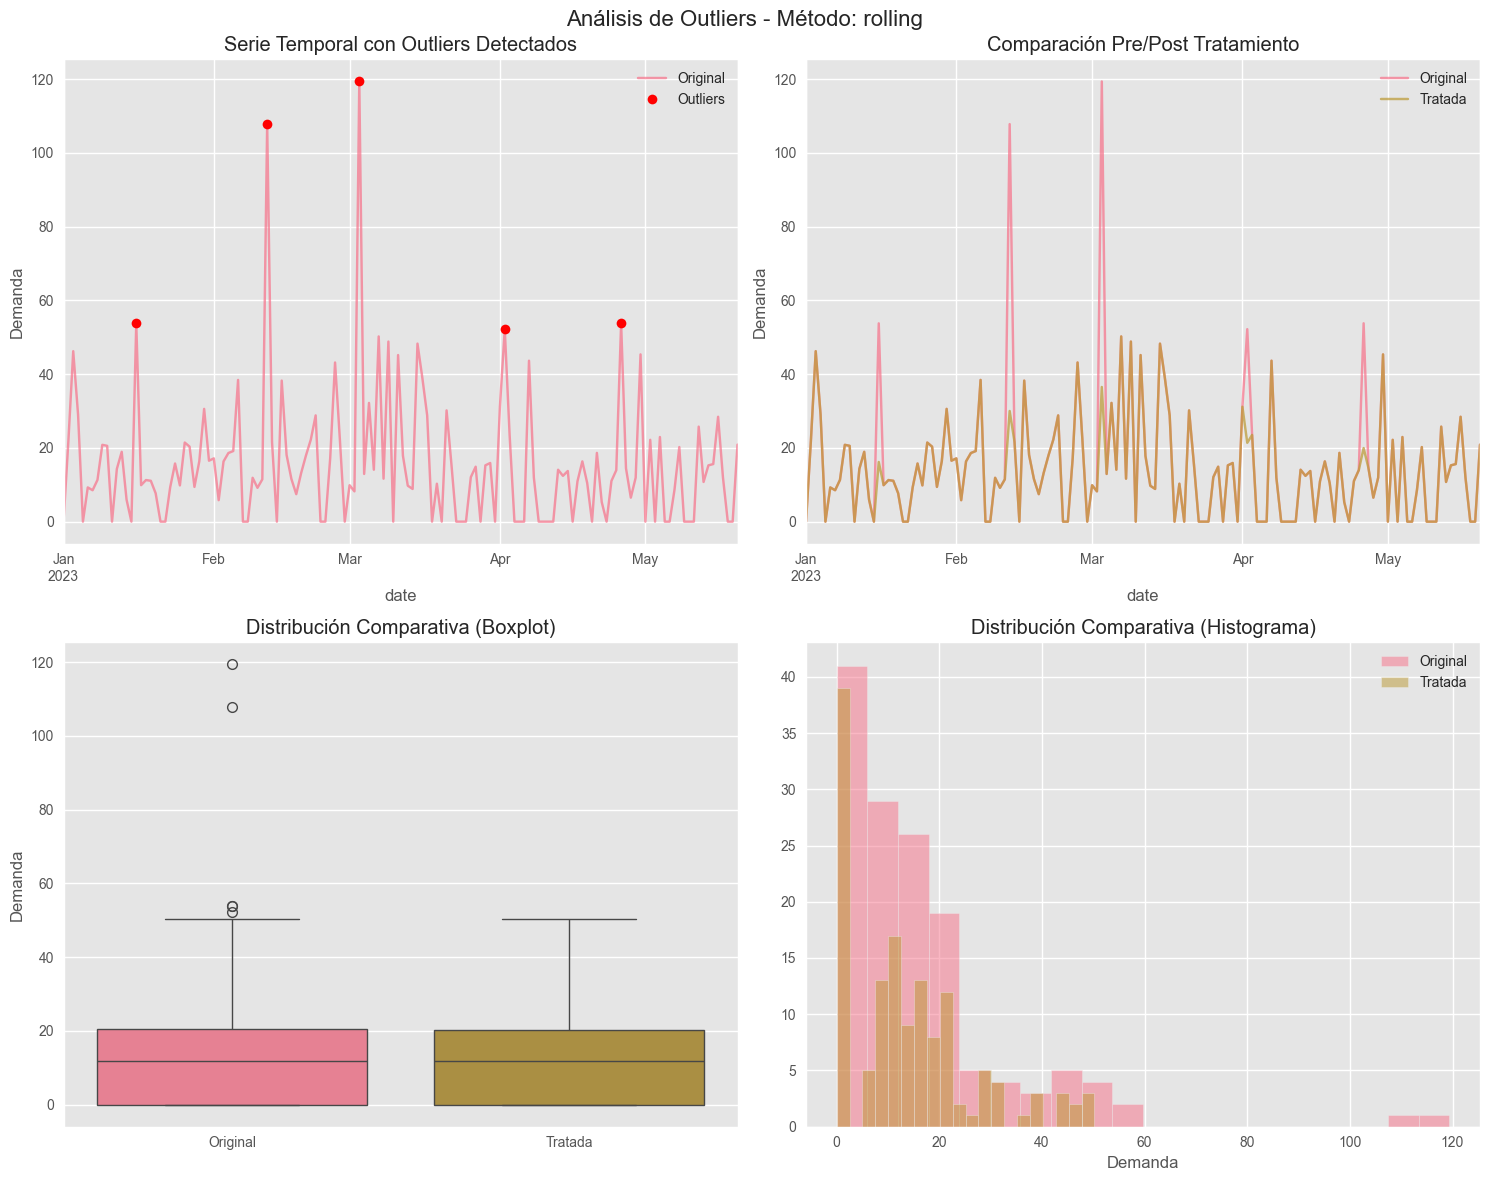


División de datos: 105 entrenamiento, 35 prueba

Aplicando Auto ARIMA...
pmdarima no disponible. Usando implementación ARIMA simple...

Resumen del modelo:
                               SARIMAX Results                                
Dep. Variable:                 demand   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -418.456
Date:                Sun, 06 Jul 2025   AIC                            842.912
Time:                        20:46:49   BIC                            850.846
Sample:                    01-01-2023   HQIC                           846.126
                         - 04-15-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0429      0.117      0.368      0.71

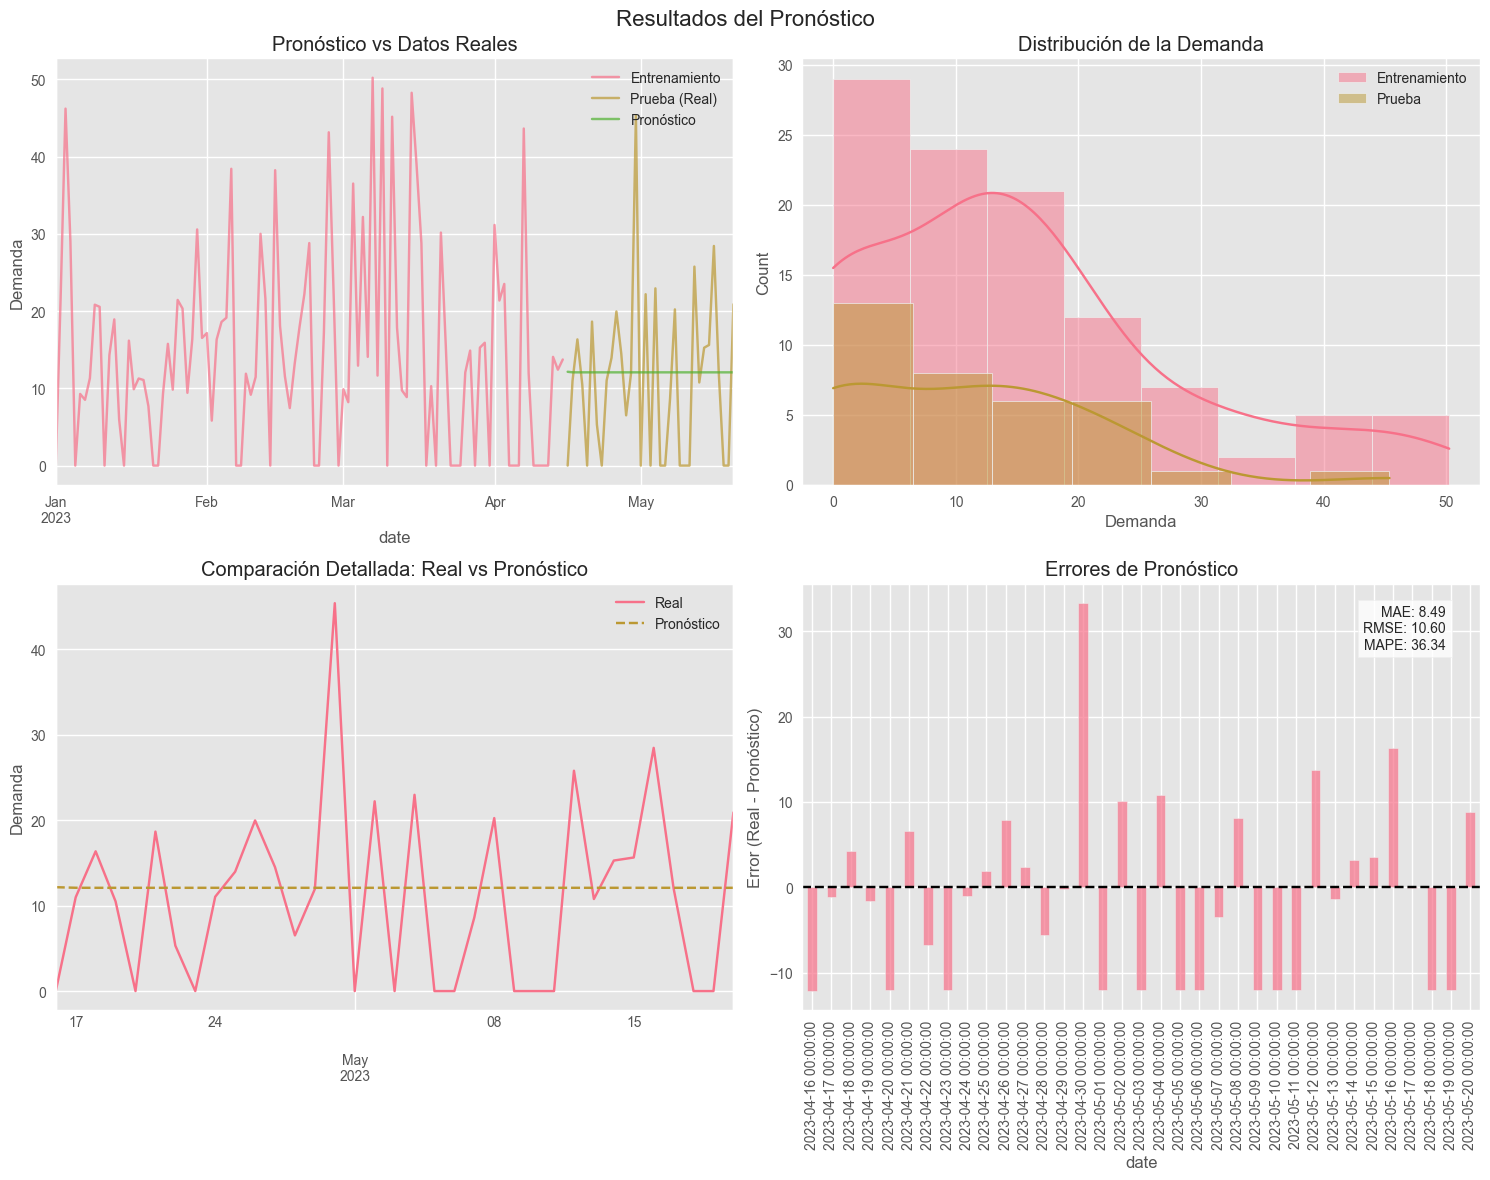


=== Recomendaciones ===
Patrón de demanda identificado: Lumpy
- Considerar métodos de pronóstico robustos para demanda errática
- Implementar buffers de seguridad más grandes
- Monitorear frecuentemente los niveles de inventario

Análisis completado.


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
from statsmodels.tsa.arima.model import ARIMA
from scipy import stats

# Configuración inicial
plt.style.use('ggplot')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
warnings.filterwarnings('ignore')  # Para evitar mensajes de advertencia molestos

# =============================================
# 1. Funciones para generación de datos sintéticos
# =============================================

def generate_erratic_demand(n_periods=140, random_seed=None):
    """
    Genera datos sintéticos de demanda errática con:
    - Tendencia ligera
    - Estacionalidad semanal
    - Ruido exponencial
    - Spikes aleatorios
    - Variabilidad multiplicativa
    - Valores extremos
    - Períodos con demanda cero
    
    Parámetros:
        n_periods: Número de períodos a generar (120-150)
        random_seed: Semilla para reproducibilidad
        
    Retorna:
        Serie temporal con la demanda generada
    """
    if random_seed is not None:
        np.random.seed(random_seed)
    
    # Fechas base (diarias)
    start_date = datetime(2023, 1, 1)
    dates = [start_date + timedelta(days=i) for i in range(n_periods)]
    
    # Componentes básicos
    trend = np.linspace(0, 0.5, n_periods)  # Tendencia ligera
    seasonality = 2 * np.sin(2 * np.pi * np.arange(n_periods) / 7)  # Estacionalidad semanal
    
    # Demanda base con ruido
    base_demand = 10 + trend + seasonality
    noise = np.random.exponential(scale=1, size=n_periods)
    demand = base_demand * (1 + 0.3 * noise)
    
    # Añadir variabilidad multiplicativa (lognormal)
    variability = np.random.lognormal(mean=0, sigma=0.3, size=n_periods)
    demand = demand * variability
    
    # Añadir spikes aleatorios (20% de probabilidad)
    spikes = np.random.choice([0, 1], size=n_periods, p=[0.8, 0.2])
    spike_values = np.random.uniform(10, 30, size=n_periods)
    demand = demand + spikes * spike_values
    
    # Añadir valores extremos (10% de los datos)
    extreme_indices = np.random.choice(n_periods, size=int(n_periods*0.1), replace=False)
    demand[extreme_indices] = demand[extreme_indices] * np.random.uniform(2, 5, size=len(extreme_indices))
    
    # Añadir períodos con demanda cero (30% de probabilidad)
    zero_demand = np.random.choice([0, 1], size=n_periods, p=[0.3, 0.7])
    demand = demand * zero_demand
    
    # Crear DataFrame con fechas
    df = pd.DataFrame({
        'date': dates,
        'demand': demand
    })
    
    # Asegurar que no haya valores negativos
    df['demand'] = df['demand'].clip(lower=0)
    
    return df.set_index('date')['demand']

# =============================================
# 2. Funciones para detección y tratamiento de outliers
# =============================================

def detect_outliers_iqr(series, multiplier=1.5):
    """
    Detecta outliers usando el método IQR (Rango Intercuartílico)
    
    Parámetros:
        series: Serie de pandas con los datos
        multiplier: Multiplicador para el rango IQR (típicamente 1.5)
        
    Retorna:
        Máscara booleana donde True indica un outlier
    """
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    
    return (series < lower_bound) | (series > upper_bound)

def treat_outliers(series, method='median', window=5, iqr_multiplier=1.5):
    """
    Trata outliers en una serie temporal usando diferentes métodos
    
    Parámetros:
        series: Serie de pandas con los datos
        method: Método de tratamiento ('median', 'mean', 'rolling', 'clip', 'remove')
        window: Tamaño de ventana para métodos de suavizado
        iqr_multiplier: Multiplicador para detección IQR
        
    Retorna:
        Serie tratada y máscara de outliers detectados
    """
    # Detectar outliers
    outliers_mask = detect_outliers_iqr(series, multiplier=iqr_multiplier)
    treated_series = series.copy()
    
    # Aplicar tratamiento según método seleccionado
    if method == 'median':
        median_val = series.median()
        treated_series[outliers_mask] = median_val
    elif method == 'mean':
        mean_val = series.mean()
        treated_series[outliers_mask] = mean_val
    elif method == 'rolling':
        # Usar media móvil centrada
        rolling_mean = series.rolling(window=window, center=True, min_periods=1).mean()
        treated_series[outliers_mask] = rolling_mean[outliers_mask]
    elif method == 'clip':
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - iqr_multiplier * iqr
        upper_bound = q3 + iqr_multiplier * iqr
        treated_series = series.clip(lower_bound, upper_bound)
    elif method == 'remove':
        treated_series[outliers_mask] = np.nan
        treated_series = treated_series.interpolate()
    else:
        raise ValueError(f"Método '{method}' no reconocido. Use: 'median', 'mean', 'rolling', 'clip' o 'remove'")
    
    return treated_series, outliers_mask

# =============================================
# 3. Funciones para clasificación de demanda
# =============================================

def calculate_demand_metrics(demand_series):
    """
    Calcula las métricas ADI y CV² para clasificación de demanda
    
    Parámetros:
        demand_series: Serie temporal con valores de demanda
        
    Retorna:
        Diccionario con ADI, CV² y otros estadísticos
    """
    # Calcular ADI (Average Demand Interval)
    non_zero_demand = demand_series[demand_series > 0]
    intervals = non_zero_demand.index.to_series().diff().dt.days.dropna()
    ADI = intervals.mean()
    
    # Calcular CV² (Coeficiente de Variación al cuadrado)
    demand_values = non_zero_demand.values
    CV_squared = (np.std(demand_values) / np.mean(demand_values)) ** 2
    
    # Calcular otros estadísticos útiles
    zero_percentage = (len(demand_series) - len(non_zero_demand)) / len(demand_series)
    mean_demand = np.mean(demand_values)
    median_demand = np.median(demand_values)
    
    return {
        'ADI': ADI,
        'CV_squared': CV_squared,
        'zero_percentage': zero_percentage,
        'mean_demand': mean_demand,
        'median_demand': median_demand,
        'demand_intervals': intervals
    }

def classify_demand_pattern(ADI, CV_squared):
    """
    Clasifica el patrón de demanda según métricas ADI y CV²
    
    Parámetros:
        ADI: Valor de Average Demand Interval
        CV_squared: Valor de Coeficiente de Variación al cuadrado
        
    Retorna:
        String con la clasificación ('Smooth', 'Intermittent', 'Erratic', 'Lumpy')
    """
    if ADI < 1.32 and CV_squared < 0.49:
        return "Smooth"
    elif ADI >= 1.32 and CV_squared < 0.49:
        return "Intermittent"
    elif ADI < 1.32 and CV_squared >= 0.49:
        return "Erratic"
    else:
        return "Lumpy"

# =============================================
# 4. Funciones para modelado ARIMA
# =============================================

def check_pmdarima():
    """
    Verifica si pmdarima está disponible
    
    Retorna:
        Booleano indicando disponibilidad
    """
    try:
        import pmdarima
        return True
    except ImportError:
        return False

def apply_auto_arima(train_data, test_data=None, seasonal=True, m=7):
    """
    Aplica Auto ARIMA con fallback a implementación simple si pmdarima no está disponible
    
    Parámetros:
        train_data: Datos de entrenamiento
        test_data: Datos de prueba (opcional)
        seasonal: Considerar estacionalidad
        m: Período estacional
        
    Retorna:
        Objeto modelo, pronóstico y métricas de error (si hay test_data)
    """
    pmdarima_available = check_pmdarima()
    
    if pmdarima_available:
        print("Usando pmdarima para Auto ARIMA...")
        from pmdarima import auto_arima
        
        # Ajustar modelo Auto ARIMA
        model = auto_arima(
            train_data,
            seasonal=seasonal,
            m=m,
            suppress_warnings=True,
            stepwise=True,
            error_action='ignore',
            trace=False
        )
        
        # Realizar pronóstico
        if test_data is not None:
            forecast = model.predict(n_periods=len(test_data))
            error_metrics = evaluate_forecast(test_data, forecast)
        else:
            forecast = None
            error_metrics = None
        
        return model, forecast, error_metrics
    else:
        print("pmdarima no disponible. Usando implementación ARIMA simple...")
        return simple_arima_forecast(train_data, test_data)

def simple_arima_forecast(train_data, test_data=None):
    """
    Implementación simple de ARIMA como fallback
    
    Parámetros:
        train_data: Datos de entrenamiento
        test_data: Datos de prueba (opcional)
        
    Retorna:
        Objeto modelo, pronóstico y métricas de error (si hay test_data)
    """
    # Ajustar modelo ARIMA(1,1,1) como default simple
    model = ARIMA(train_data, order=(1,1,1))
    model_fit = model.fit()
    
    # Realizar pronóstico
    if test_data is not None:
        forecast = model_fit.forecast(steps=len(test_data))
        error_metrics = evaluate_forecast(test_data, forecast)
    else:
        forecast = None
        error_metrics = None
    
    return model_fit, forecast, error_metrics

# =============================================
# 5. Funciones para evaluación y visualización
# =============================================

def evaluate_forecast(actual, forecast):
    """
    Calcula métricas de error para evaluar pronóstico
    
    Parámetros:
        actual: Valores reales
        forecast: Valores pronosticados
        
    Retorna:
        Diccionario con métricas de error
    """
    # Filtrar valores cero para evitar divisiones por cero en MAPE
    mask = actual > 0
    actual_non_zero = actual[mask]
    forecast_non_zero = forecast[mask]
    
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    
    # Calcular MAPE solo si hay valores no cero
    if len(actual_non_zero) > 0:
        mape = np.mean(np.abs((actual_non_zero - forecast_non_zero) / actual_non_zero)) * 100
    else:
        mape = np.nan
    
    return {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape
    }

def plot_outliers_analysis(original_series, treated_series, outliers_mask, treatment_method):
    """
    Genera gráficos para análisis de outliers
    
    Parámetros:
        original_series: Serie original
        treated_series: Serie tratada
        outliers_mask: Máscara de outliers detectados
        treatment_method: Método de tratamiento usado
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'Análisis de Outliers - Método: {treatment_method}', fontsize=16)
    
    # 1. Serie temporal con outliers destacados
    ax = axes[0, 0]
    original_series.plot(ax=ax, label='Original', alpha=0.7)
    original_series[outliers_mask].plot(ax=ax, style='ro', label='Outliers')
    ax.set_title('Serie Temporal con Outliers Detectados')
    ax.set_ylabel('Demanda')
    ax.legend()
    
    # 2. Comparación pre/post tratamiento
    ax = axes[0, 1]
    original_series.plot(ax=ax, label='Original', alpha=0.7)
    treated_series.plot(ax=ax, label='Tratada', alpha=0.7)
    ax.set_title('Comparación Pre/Post Tratamiento')
    ax.set_ylabel('Demanda')
    ax.legend()
    
    # 3. Boxplot comparativo
    ax = axes[1, 0]
    df_boxplot = pd.DataFrame({
        'Original': original_series,
        'Tratada': treated_series
    })
    sns.boxplot(data=df_boxplot, ax=ax)
    ax.set_title('Distribución Comparativa (Boxplot)')
    ax.set_ylabel('Demanda')
    
    # 4. Histograma comparativo
    ax = axes[1, 1]
    original_series.hist(ax=ax, alpha=0.5, bins=20, label='Original')
    treated_series.hist(ax=ax, alpha=0.5, bins=20, label='Tratada')
    ax.set_title('Distribución Comparativa (Histograma)')
    ax.set_xlabel('Demanda')
    ax.legend()
    
    plt.tight_layout()
    plt.show()

def plot_results(train_data, test_data, forecast, error_metrics):
    """
    Genera gráficos para visualización de resultados del pronóstico
    
    Parámetros:
        train_data: Datos de entrenamiento
        test_data: Datos de prueba
        forecast: Valores pronosticados
        error_metrics: Diccionario con métricas de error
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Resultados del Pronóstico', fontsize=16)
    
    # 1. Pronóstico vs datos reales
    ax = axes[0, 0]
    train_data.plot(ax=ax, label='Entrenamiento', alpha=0.7)
    test_data.plot(ax=ax, label='Prueba (Real)', alpha=0.7)
    pd.Series(forecast, index=test_data.index).plot(ax=ax, label='Pronóstico', alpha=0.7)
    ax.set_title('Pronóstico vs Datos Reales')
    ax.set_ylabel('Demanda')
    ax.legend()
    
    # 2. Distribución de la demanda
    ax = axes[0, 1]
    sns.histplot(train_data, ax=ax, kde=True, label='Entrenamiento', alpha=0.5)
    sns.histplot(test_data, ax=ax, kde=True, label='Prueba', alpha=0.5)
    ax.set_title('Distribución de la Demanda')
    ax.set_xlabel('Demanda')
    ax.legend()
    
    # 3. Comparación detallada de pronósticos
    ax = axes[1, 0]
    comparison_df = pd.DataFrame({
        'Real': test_data,
        'Pronóstico': forecast
    })
    comparison_df.plot(ax=ax, style=['-', '--'])
    ax.set_title('Comparación Detallada: Real vs Pronóstico')
    ax.set_ylabel('Demanda')
    
    # 4. Análisis de errores
    ax = axes[1, 1]
    errors = test_data - forecast
    errors.plot(ax=ax, kind='bar', alpha=0.7)
    ax.axhline(0, color='black', linestyle='--')
    ax.set_title('Errores de Pronóstico')
    ax.set_ylabel('Error (Real - Pronóstico)')
    
    # Añadir métricas como texto
    metrics_text = "\n".join([f"{k}: {v:.2f}" for k, v in error_metrics.items()])
    ax.text(0.95, 0.95, metrics_text, transform=ax.transAxes, 
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

def analyze_demand_characteristics(demand_series):
    """
    Realiza un análisis estadístico detallado de la serie de demanda
    
    Parámetros:
        demand_series: Serie temporal con valores de demanda
        
    Retorna:
        DataFrame con estadísticos descriptivos
    """
    # Calcular métricas básicas
    stats_df = pd.DataFrame({
        'Valor': [
            demand_series.mean(),
            demand_series.median(),
            demand_series.std(),
            demand_series.skew(),
            demand_series.kurt(),
            (demand_series == 0).mean(),
            demand_series.autocorr(lag=1),
            demand_series.autocorr(lag=7)
        ]
    }, index=[
        'Media', 'Mediana', 'Desviación Estándar', 
        'Sesgo', 'Curtosis', '% Ceros', 
        'Autocorrelación (lag=1)', 'Autocorrelación (lag=7)'
    ])
    
    # Calcular métricas de clasificación
    demand_metrics = calculate_demand_metrics(demand_series)
    demand_class = classify_demand_pattern(demand_metrics['ADI'], demand_metrics['CV_squared'])
    
    # Añadir métricas adicionales
    stats_df.loc['ADI'] = demand_metrics['ADI']
    stats_df.loc['CV²'] = demand_metrics['CV_squared']
    stats_df.loc['Patrón de Demanda'] = demand_class
    
    return stats_df

# =============================================
# 6. Flujo principal de ejecución
# =============================================

def main():
    print("=== Análisis de Demanda Errática con Auto ARIMA y Tratamiento de Outliers ===")
    
    # 1. Generar datos sintéticos
    print("\nGenerando datos sintéticos de demanda errática...")
    demand_series = generate_erratic_demand(n_periods=140, random_seed=42)
    
    # 2. Analizar características de la demanda
    print("\nAnalizando características de la demanda generada...")
    demand_stats = analyze_demand_characteristics(demand_series)
    print("\nEstadísticos de la demanda:")
    print(demand_stats)
    
    # 3. Detectar y tratar outliers
    print("\nDetectando y tratando outliers...")
    treatment_method = 'rolling'  # Puede cambiarse a 'median', 'mean', 'clip' o 'remove'
    treated_demand, outliers_mask = treat_outliers(demand_series, method=treatment_method)
    
    # Mostrar resumen de tratamiento
    n_outliers = outliers_mask.sum()
    print(f"\nOutliers detectados: {n_outliers} ({n_outliers/len(demand_series)*100:.1f}%)")
    print(f"Método de tratamiento aplicado: {treatment_method}")
    
    # 4. Visualizar análisis de outliers
    plot_outliers_analysis(demand_series, treated_demand, outliers_mask, treatment_method)
    
    # 5. Dividir datos en entrenamiento y prueba
    train_size = int(len(treated_demand) * 0.75)
    train_data = treated_demand[:train_size]
    test_data = treated_demand[train_size:]
    
    print(f"\nDivisión de datos: {len(train_data)} entrenamiento, {len(test_data)} prueba")
    
    # 6. Aplicar Auto ARIMA
    print("\nAplicando Auto ARIMA...")
    model, forecast, error_metrics = apply_auto_arima(train_data, test_data)
    
    # Mostrar resumen del modelo
    print("\nResumen del modelo:")
    print(model.summary() if hasattr(model, 'summary') else "Modelo ARIMA simple (1,1,1)")
    
    # 7. Evaluar resultados
    if error_metrics is not None:
        print("\nMétricas de error del pronóstico:")
        for metric, value in error_metrics.items():
            print(f"{metric}: {value:.2f}")
    
    # 8. Visualizar resultados
    plot_results(train_data, test_data, forecast, error_metrics)
    
    # 9. Recomendaciones finales
    print("\n=== Recomendaciones ===")
    demand_class = demand_stats.loc['Patrón de Demanda', 'Valor']
    print(f"Patrón de demanda identificado: {demand_class}")
    
    if demand_class in ['Erratic', 'Lumpy']:
        print("- Considerar métodos de pronóstico robustos para demanda errática")
        print("- Implementar buffers de seguridad más grandes")
        print("- Monitorear frecuentemente los niveles de inventario")
    elif demand_class == 'Intermittent':
        print("- Usar métodos específicos para demanda intermitente (Croston, etc.)")
        print("- Considerar sistemas de revisión periódica")
    else:
        print("- Métodos tradicionales de pronóstico pueden ser adecuados")
    
    print("\nAnálisis completado.")

if __name__ == "__main__":
    main()